In [43]:
# Scikit-learn version 0.24.2
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Import SciPy's shift function for moving a matrix in some direction
from scipy.ndimage.interpolation import shift

In [44]:
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)

In [45]:
# Make copies of elements from x and the labels from y
X_tr_shifted = [digit for digit in X_tr]
y_tr_shifted = [label for label in y_tr]

def shift_pixels(matrix, j, k):
    maxtrix = matrix.reshape((28, 28))
    new_matrix = shift(maxtrix, [k, j], cval=0, mode="constant")
    return new_matrix.reshape([-1])

# shift up, down, right, or left by 1 pixel
for j, k in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    # give images from x the corresponding label from y
    for digit, label in zip(X_tr, y_tr):
        # Shift digit by one pixel, add corresponding label
        X_tr_shifted.append(shift_pixels(digit, j, k))
        y_tr_shifted.append(label)

# convert back to numpy arrays
X_tr_shifted = np.array(X_tr_shifted)
y_tr_shifted = np.array(y_tr_shifted)
# Randomize 
shuffled_tr = np.random.permutation(len(X_tr_shifted))
X_tr_shifted = X_tr_shifted[shuffled_tr]
y_tr_shifted = y_tr_shifted[shuffled_tr]

In [46]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_tr_shifted, y_tr_shifted)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [47]:
y_tr_pred = cross_val_predict(knn_clf, X_tr_shifted, y_tr_shifted, cv=3)

In [48]:
target_names = ["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"]
print(classification_report(y_tr_shifted, y_tr_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99     29600
     class 1       0.97      1.00      0.99     33625
     class 2       0.99      0.98      0.99     30115
     class 3       0.98      0.98      0.98     30535
     class 4       0.99      0.98      0.98     29590
     class 5       0.98      0.98      0.98     26880
     class 6       0.99      0.99      0.99     29575
     class 7       0.98      0.98      0.98     31190
     class 8       0.99      0.96      0.98     29280
     class 9       0.97      0.98      0.97     29610

    accuracy                           0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000



In [49]:
confusion_matrix(y_tr_shifted, y_tr_pred)

array([[29496,    20,     3,     3,     5,    15,    38,     8,     2,
           10],
       [    0, 33551,    23,     1,     6,     0,     7,    23,     5,
            9],
       [  108,   106, 29473,    46,     7,    10,    14,   310,    25,
           16],
       [    8,    40,    60, 30046,     1,   156,     3,    99,    73,
           49],
       [   13,   195,     1,     1, 28993,     0,    29,    29,     2,
          327],
       [   46,    17,    10,   131,    15, 26363,   205,     6,    20,
           67],
       [   63,    56,     0,     1,    10,    46, 29389,     0,    10,
            0],
       [    2,   261,    39,     3,    32,     5,     0, 30701,     5,
          142],
       [   43,   167,    45,   253,    49,   203,   122,    50, 28136,
          212],
       [   43,    70,    10,    85,   187,    44,     3,   226,    16,
        28926]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

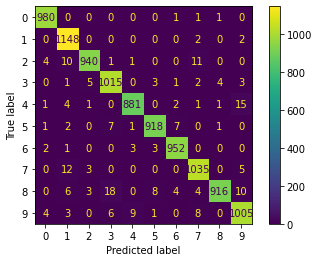

In [50]:
plot_confusion_matrix(knn_clf, X_ts, y_ts)
plt.show

In [52]:
cm = confusion_matrix(y_tr_shifted, y_tr_pred)
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

<function matplotlib.pyplot.show(close=None, block=None)>

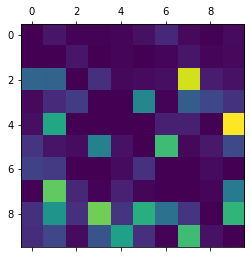

In [53]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.viridis)
plt.show